# First steps

After installing the plugin you can open it from the napari menu under the name ```Convpaint```.

You can use the plugin with various types of images: simple gray-scale, multi-channel, time-lapse, RGB. Note that while you can annotate stacks of slices as a single 3D image, the learning is (currently) not done in true 3D. instead, the 2D annotations from each slice in the stack are combined for training.

To start you can just use one of the sample images that napari provide. For example the ```human mitosis``` dataset:

In [2]:
import napari
from napari_convpaint.conv_paint_widget import ConvPaintWidget

In [3]:
viewer = napari.Viewer()
viewer.open_sample(plugin='napari', sample='human_mitosis')
self = ConvPaintWidget(viewer)
viewer.window.add_dock_widget(self)

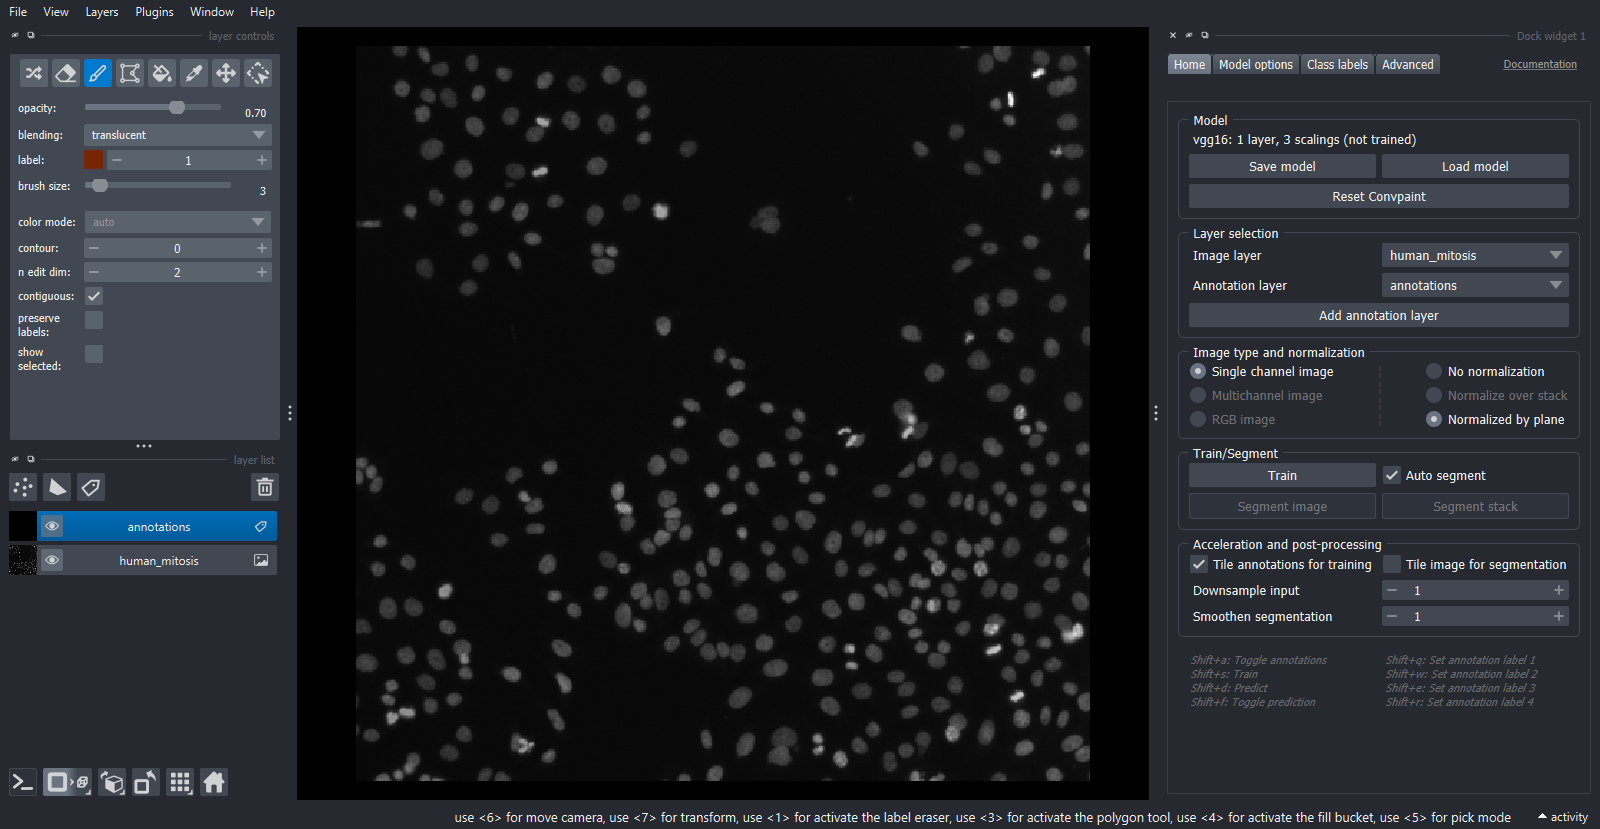

In [5]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

## Layer selection
If you have multiple image layers open, you can **choose the layer** you want to use for training and segmentation. You should also choose a layer of the type *labels* to use for annotations. If you don't yet have a labels layer, you can just click on ```Add annotation layer```. Then using the labels tools (on the left of the viewer), you can pick the ```label``` to use for drawing. In this example, each label will correspond to a given type of structure you want to segment. If you just want to detect one type of object, you will need two labels: one for background (typically 1) and one for objects (2). With the pen tool, you can then **create annotations for training**:

In [6]:
self._on_add_annot_layer()

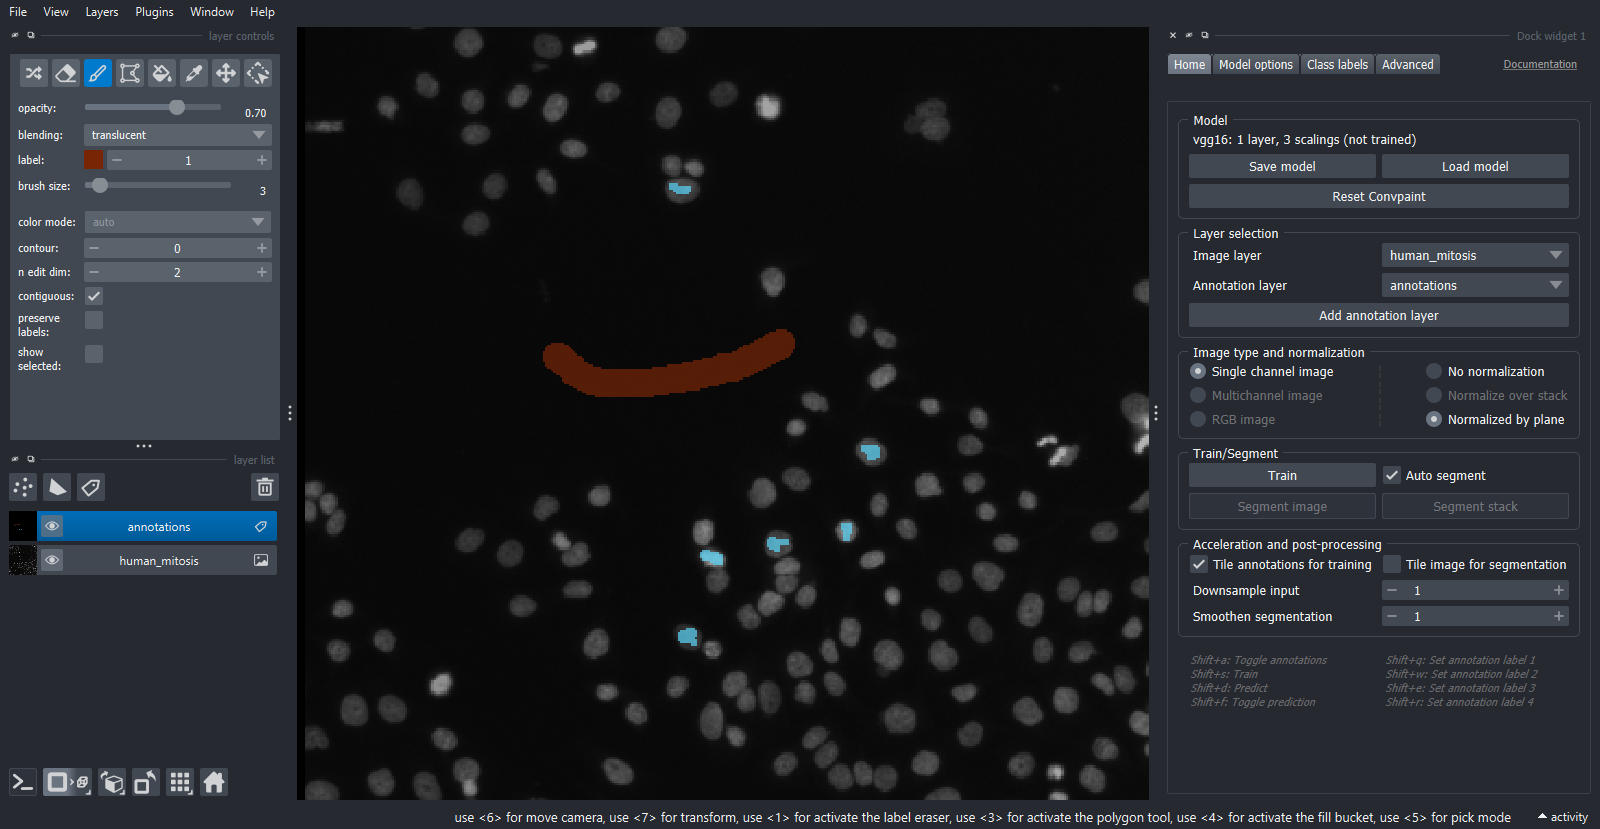

In [8]:
import skimage
# skimage.io.imsave('../sample_data/first_steps_annotations.tiff',
#                 viewer.layers['annotations'].data, check_contrast=False)
labels = skimage.io.imread('../sample_data/first_steps_annotations.tiff')
viewer.layers['annotations'].data = labels
viewer.layers['annotations'].refresh()

viewer.camera.zoom = 2.18
viewer.camera.center = (0.0, 255.04128441771698, 191.27981848034926)

nbscreenshot(viewer)

## Train and segment

Once you have added a few annotations, you can train your model. For that just, click on the ```Train``` button. A progress bar indicates whether training is finished or not. Once done, you can segment your image with the trained pixel classifier using the ```Segment image``` button:

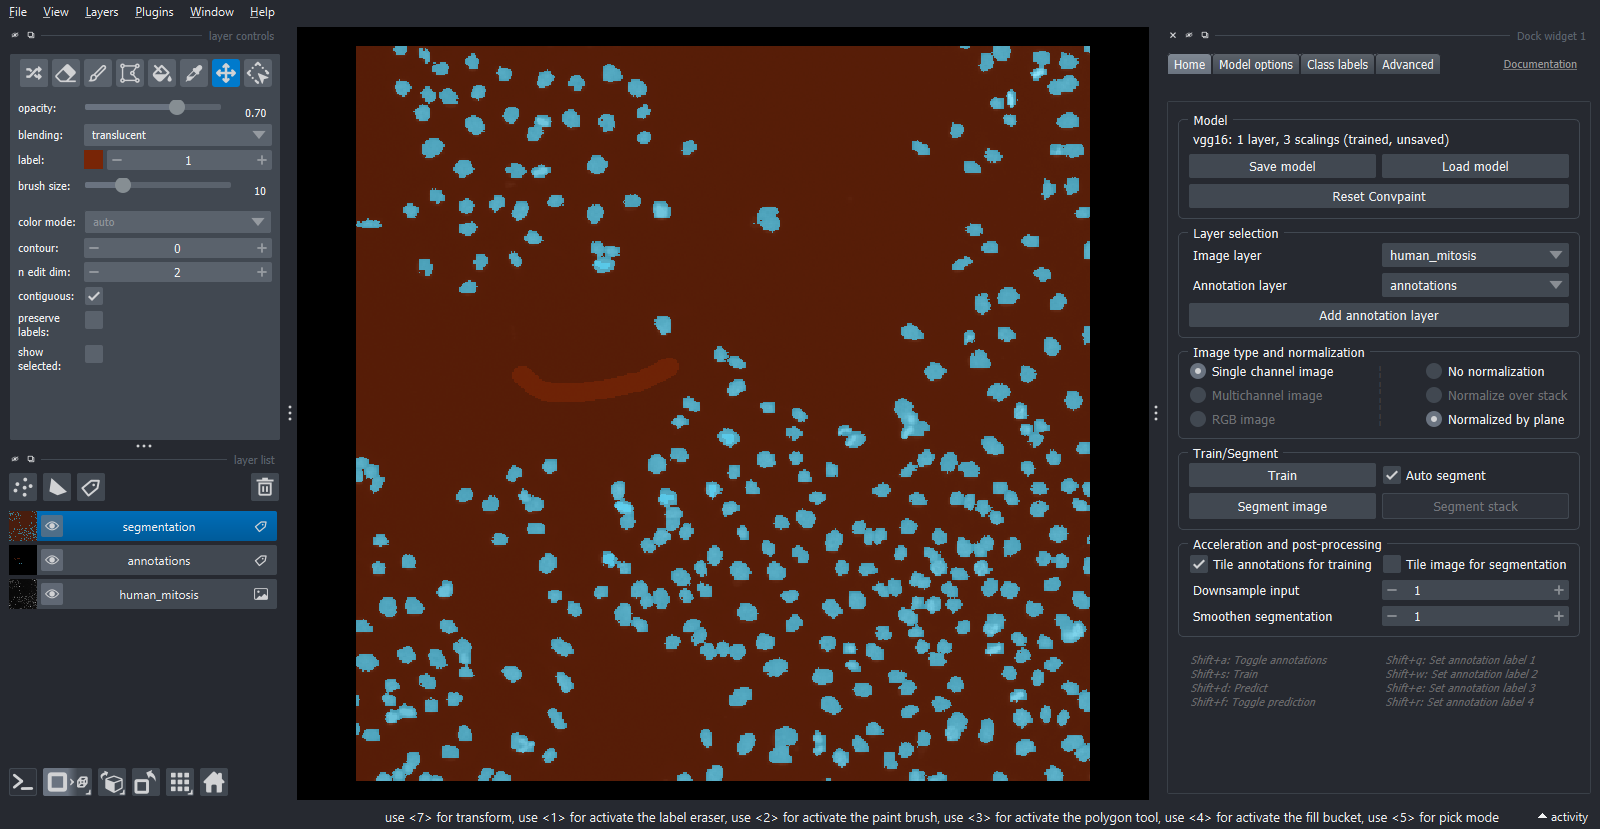

In [12]:
# self._on_train()
nbscreenshot(viewer)

If you are not yet satisfied with the result, you can repeat the cycle: add more annotations or adjust the model, before clicking on ```Train``` and then on ```Segment``` (the latter will be done automatically after training if the option `Auto segment` is enabled).

Once you are satisfied, you can save your model to your computer to be able to re-use it later one. For that click on the ```Save model``` button. This will prompt you to pick a model name and location. You then have two options:

- Save the information about the model used, without the classifier, in a `.yml` file

- Save the entire model, including the classifier, in a `.pickle` file

To reload the model, click on `Load model` and pick the file you've previously saved. In the top line of the plugin you can check the key parameters of your current model and also its state (in parentheses): no model, a trained but unsaved model or a model with a given name.